<a href="https://colab.research.google.com/github/nromano2/MLA_NVR/blob/main/MLA4_NVR/MLA4_NVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLA4_NVR
## Nicholas Romano
## CS 430
## Machine Learning in the Cloud
---

## Library Imports

In [1]:
#Library to Mount to Google Drive to Retrieve Data
from google.colab import drive
drive.mount('/content/drive')

#Data Handling Library Imports
import pandas as pd
import numpy as np

#Pipeline Library Imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Preprocessing Library Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Decision Tree Model Library Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#Model Evaluation Library Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, root_mean_squared_error, classification_report

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Decision Tree Classifer

### Loading Data

In [2]:
banknote = pd.read_csv('/content/drive/MyDrive/banknote_authentication.csv')
banknote.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Train Test Splitting of Data

In [3]:
X = banknote.drop(columns=['forgery'])
y = banknote['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating Preprocessing Pipelines

In [4]:
numerical_columns = X.select_dtypes(include=['number']).columns

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns)
])

DecisionTreeClassifierPipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

### Executing the Decision Tree Classifier Pipeline

In [5]:
DecisionTreeClassifierPipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Evaluting Decision Tree Classifer Model

In [6]:
y_pred = DecisionTreeClassifierPipeline.predict(X_test)

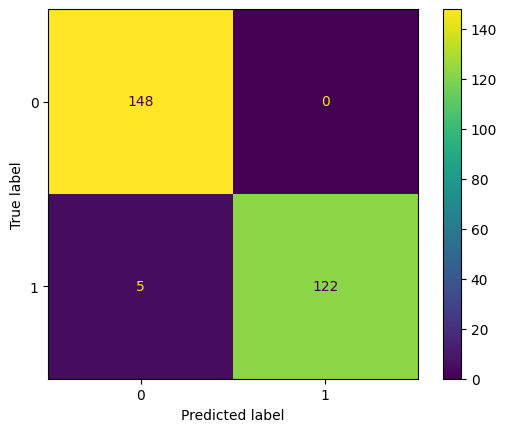

In [7]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [8]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision Score: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision Score: 1.0
Recall: 0.9606299212598425
F1 Score: 0.9799196787148594


### Decision Tree Classifier Conclusion

With the precision score, recall score, and F1 score all being above 95%, the decision tree classifier model did well at predicting whether or not a given banknote was a forgery. The model was able to accurately distinguish between the positive and negative classes since there were not any false positives, which resulted in the 100% precision score. Furthermore, the model was able to limit the number of false negatives to 5, which might be attributed to a slight imbalance in the data toward non-forgery banknotes. Everything considered, the decision tree classifier model did well in predicting forgery banknotes


---
## Decision Tree Regressor

### Loading Data

In [9]:
steel_industry = pd.read_csv('/content/drive/MyDrive/Steel_industry_data.csv')
steel_industry.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


**Renaming Columns**

In [10]:
steel_industry.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [11]:
steel_industry.rename(columns={
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor': 'lag_current_pwr',
    'Leading_Current_Power_Factor': 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
    }, inplace=True)

In [12]:
steel_industry.columns

Index(['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type'],
      dtype='object')

### Train Test Splitting of the Data

In [13]:
X = steel_industry.drop(columns=['date',
                                 'usage_kwh'])

y = steel_industry['usage_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

### Creating Pipelines

In [15]:
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('OneHot', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

DecisionTreeRegressorPipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

### Executing the Model

In [16]:
DecisionTreeRegressorPipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder())]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

### Evaluating the Model

In [17]:
y_pred_train = DecisionTreeRegressorPipeline.predict(X_train)
y_pred_test = DecisionTreeRegressorPipeline.predict(X_test)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f"Root Mean Squared Error [Training Data]: {rmse_train}")

rmse_test = root_mean_squared_error(y_test, y_pred_test)
print(f"Root Mean Squared Error [Testing Data]: {rmse_test}")

Root Mean Squared Error [Training Data]: 1.851955252463718e-16
Root Mean Squared Error [Testing Data]: 1.4140982088568803


**Interpretation:**  
The decision tree regression model returned a root mean squared error near 0 for the training data, due to the fact that the model was initially fitted on the training data.  
The more important score is the root mean squared error for the testing data, which is used for validation. The root mean squared eeor for the testing data is just above 1.4. This indicates that the model was able to predict `Usage_kWh` within around 1.4 units on average.

### Decision Tree Regressor Conclusion

With a root mean squared error of just above 1.4, this indicates that the model was able to accurately predict the `Usage_kWh` values based on data it had not been trained on. This indicates that given the variables within the dataset, the Decision Tree Regressor model is a good predictor at predicting `Usage_kWh` values.